# Wishart process 

An Introduction to Random exercice 4.3.8 Matrix p263 (Anderson Guionnet Zeitouni) [cupbook]

# 1. Random matrix simulation

In [1]:
%pylab inline
from numpy.matlib import repmat
import plotly.graph_objs as go
import plotly.offline
from matplotlib.gridspec import GridSpec
from plot_tools import adjust_spines, sc_law, plot_dpp, plot_traj_with_histo, plot_traj_with_histo_sclaw

Populating the interactive namespace from numpy and matplotlib


In [2]:
class wishart:
    def __init__(self, N, n_traj, n_samples, tf):
        self.N = N
        self.n_traj = n_traj
        self.n_samples = n_samples
        self.tf = tf
        self.dt = tf/n_samples
        self.matrices = [np.zeros((self.N, self.n_traj))]
        self.generate()
        self.eigen_values = [ np.zeros(self.n_traj) ]
        self.diag()

    def generate(self):
        for sample in range(self.n_samples-1):
            real_values = np.random.randn(self.N, self.n_traj)
            im_values = np.random.randn(self.N, self.n_traj)
            V_t = np.matrix(real_values + 1j * im_values) * (1/2)**0.5
            self.matrices.append( self.matrices[sample] + (V_t * self.dt**0.5) )

    def diag(self):
        for sample in range(self.n_samples-1):
            V_t_star_V_t = np.dot(np.matrix(self.matrices[sample+1]).H, self.matrices[sample+1])
            self.eigen_values.append(sorted( np.real(np.linalg.eigvals(V_t_star_V_t)), reverse=True) )

    def plot(self):
        data=[]
        for traj in range(self.n_eigen_values):
            traj_trace = go.Scatter(
                x=self.dt*np.array(range(self.n_samples)),
                y=(self.eigen_values.T)[traj],
                mode='lines')
            data.append(traj_trace)
        layout = go.Layout(showlegend=False)
        fig = go.Figure(data=data, layout=layout)
        plotly.offline.init_notebook_mode()
        plotly.offline.iplot(fig)

In [3]:
test_random_matrix = wishart(N=80, n_traj=20, n_samples=100, tf=1)
#test_random_matrix.plot()

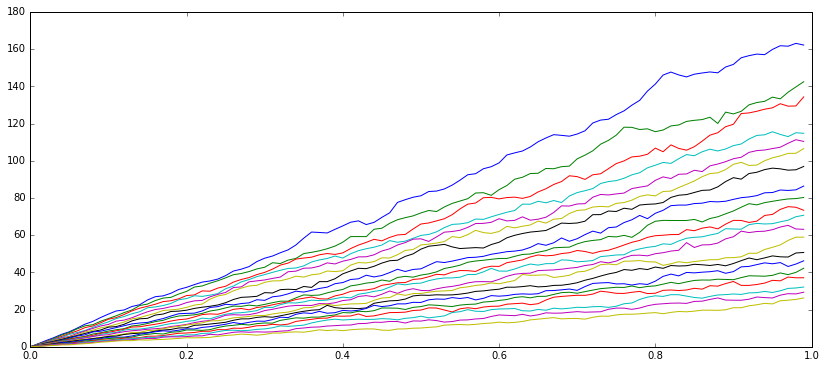

In [5]:
fig = plt.figure(1, figsize=(14, 6))

t = np.matlib.repmat(np.arange(0, test_random_matrix.tf, test_random_matrix.dt),test_random_matrix.n_traj,1)
plt.plot(t.T, test_random_matrix.eigen_values)
plt.savefig('./plot/wishart.png', bbox_inches='tight')